In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
import json
import sys
import os
import glob
import time
import pandas as pd
from scipy import signal

# sys.path.append("../../../my_python_library")
sys.path.append("scripts")
from smoothness import sparc, log_dimensionless_jerk2
from support_nb2 import generate_simulated_movements as gen_sim_move
from support_nb2 import smoothness_summary_plot as smooth_sum_plot
from support_nb2 import estimate_smoothness_values as est_smooth_val
from support_nb2 import movement_profile_plots
from support_nb2 import ldlj_factors

## Smoothness versus submovement number and submovement interval
This section plots the smoothness of simulated movements as a function of the number of submovements and the inter-submovement interval. The smoothness are estimated using both the speed and acceleration data just to compare the two different profiles.

In [3]:
Ns = [2, 4, 6, 8, 10]
Ts = 1.0
delT = 0.05
dT = np.arange(0, 2 * Ts + delT, delT)
ts = 0.001
m_types = ('speed', 'accl', 'jerk')

# generate movements
moves = gen_sim_move(Ns, dT, Ts, ts, move_type='gaussian')

Ns: 10, dT: 2.0

Type: jerk, Ns: 10, dT: 2.0

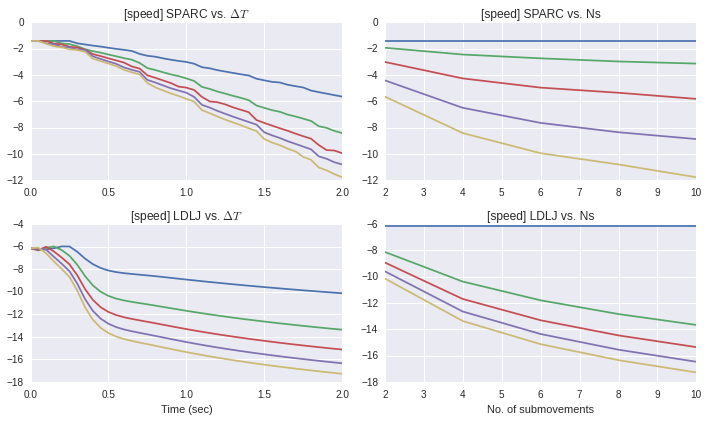

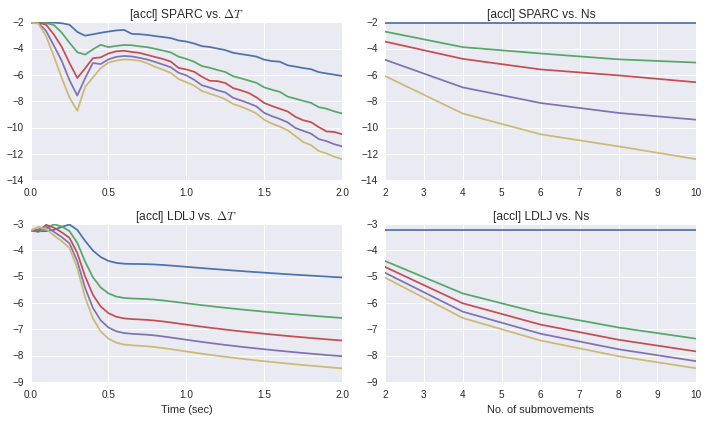

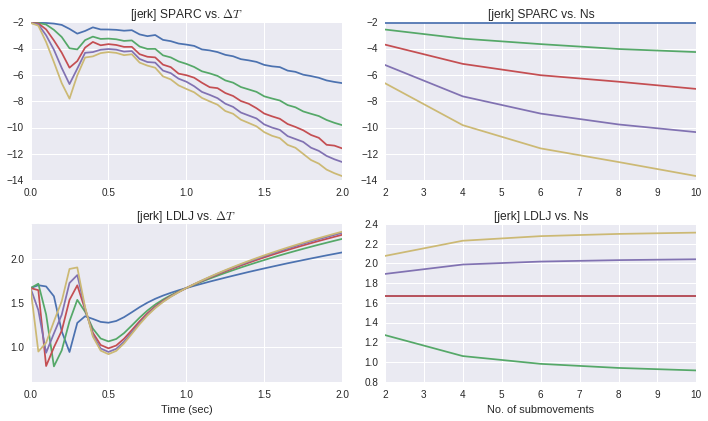

In [4]:
# estimate smoothness and plot summary
smooth_vals = est_smooth_val(moves, Ns, dT, ts, m_types)
figs = smooth_sum_plot(Ns, dT, m_types, smooth_vals)

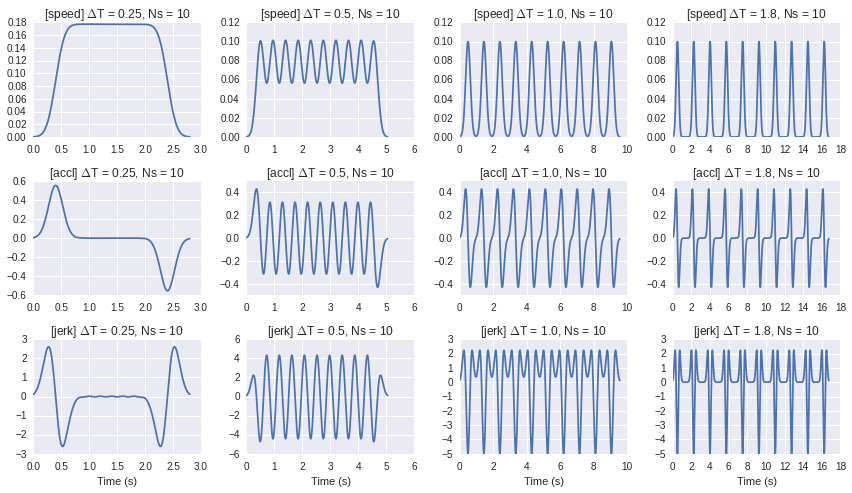

In [5]:
movement_profile_plots(moves, Ns, dT, delT, ts, m_types)

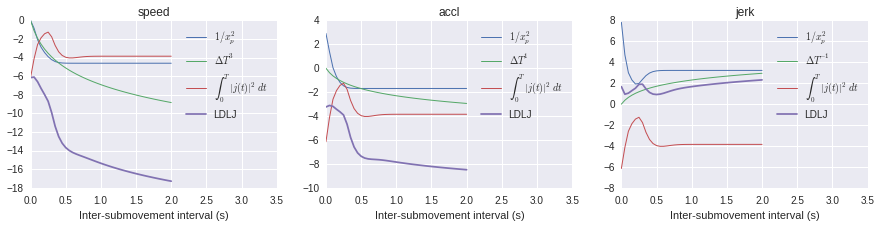

In [7]:
ldlj_factors(moves, Ns, dT, ts, m_types)